525 188


C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


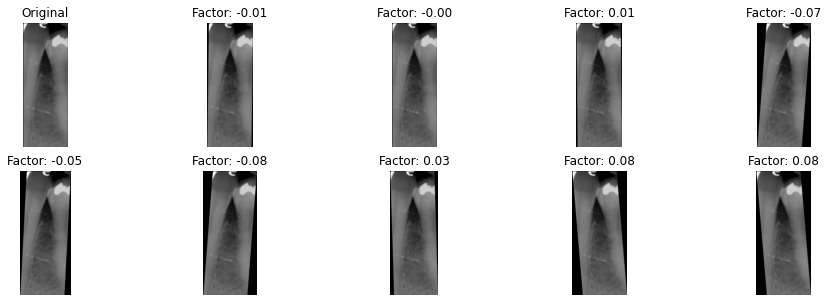

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

path = "Dental_Data/PBL/10_interdental_20200901_Max_4/08-09-24-794_000408 102419 x_21_-4_L.png"
img = cv2.imread(path, 0)
H, W = img.shape
print(H, W)

# M2[0,2] = -M2[0,1] * W/2
# M2[1,2] = -M2[1,0] * H/2
plt.figure(figsize=(16, 5))
plt.subplot(2, 5, 1)
plt.title("Original")
plt.axis('off')
plt.imshow(img, cmap='gray')

shear_range  = ( -0.1 , 0.1)

for i in range(2, 11, 1):
        shear_factor = random.uniform(*shear_range)
        corner = np.float32([ 
                      [0, 0],
                      [H, 0],
                      [H, W],
                      [0, W]
                   ])
        
        affine = np.float32([ 
                    [1, shear_factor],
                    [0, 1],
                 ])
        
        new_corner = np.dot(corner, affine)
        
        negative = new_corner[new_corner<0]
        
        
        if not negative: M2 = np.float32([[1, shear_factor, 0], [0, 1, 0]])
        else: M2 = np.float32([[1, shear_factor, -negative], [0, 1, 0]])
        
        nW = img.shape[1] + abs(shear_factor*img.shape[0])

        aff2 = cv2.warpAffine(img, M2, (int(nW), H))
        plt.subplot(2, 5, i)
        plt.title("Factor: %.2f" % shear_factor)
        plt.axis('off')
        plt.imshow(aff2, cmap='gray')
        
plt.show()

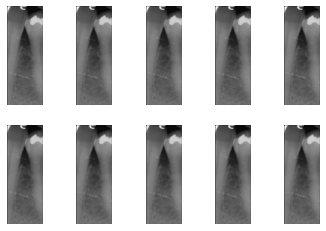

In [67]:
mean = 0
var = 10
sigma = var ** 0.5

for i in range(1, 11, 1):
        gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1])) 
        noise = img + gaussian
        plt.subplot(2, 5, i)
        plt.axis('off')
        plt.imshow(noise, cmap='gray')

C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Lab620\Anaconda3\envs\lawrence\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


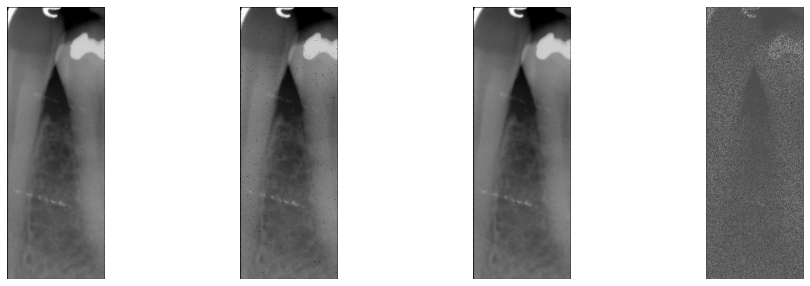

In [82]:
def noisy(noise_typ,image):
        if noise_typ == "gauss":
              row,col= image.shape
              mean = 0
              var = 0.1
              sigma = var**0.5
              gauss = np.random.normal(mean,sigma,(row,col))
              gauss = gauss.reshape(row,col)
              noisy = image + gauss
              return noisy
        
        elif noise_typ == "s&p":
              row,col = image.shape
              s_vs_p = 0.5
              amount = 0.004
              out = np.copy(image)
              # Salt mode
              num_salt = np.ceil(amount * image.size * s_vs_p)
              coords = [np.random.randint(0, i - 1, int(num_salt))
                      for i in image.shape]
              out[coords] = 1

              # Pepper mode
              num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
              coords = [np.random.randint(0, i - 1, int(num_pepper))
                      for i in image.shape]
              out[coords] = 0
              return out
        
        elif noise_typ == "poisson":
              vals = len(np.unique(image))
              vals = 2 ** np.ceil(np.log2(vals))
              noisy = np.random.poisson(image * vals) / float(vals)
              return noisy
            
        elif noise_typ == "speckle":
              row,col = image.shape
              gauss = np.random.randn(row,col)
              gauss = gauss.reshape(row,col)        
              noisy = image + image * gauss
              return noisy

modes = ["gauss", "s&p",  "poisson", "speckle"]
plt.figure(figsize=(16, 5))
for idx, mode in enumerate(modes, 1):
    noise_image = noisy(mode, img)
    plt.subplot(1, 4, idx)
    plt.axis('off')
    plt.imshow(noise_image, cmap='gray')
plt.show()